In [6]:
import sys
import subprocess
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seismic-library/')
import kaggle_support as kgs
import matplotlib.pyplot as plt

1004 CurveFault_B


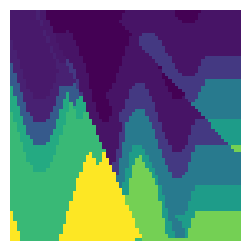

7002 FlatVel_B


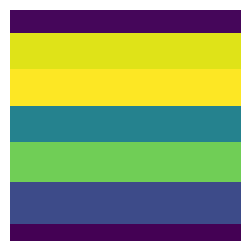

8000 Style_A


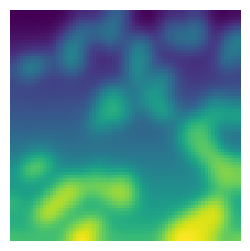

9001 Style_B


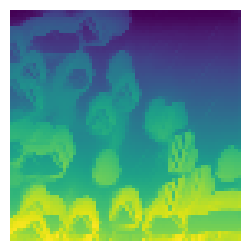

In [13]:
data = kgs.load_all_train_data()
to_plot = [1004,7002,8000,9001]
for p in to_plot:
    d = data[p]
    print(p, d.family)
    d.load_to_memory()
    plt.figure(figsize=(3,3))
    plt.imshow(d.velocity.data.get())
    #plt.xlabel('Position along surface')
    #plt.ylabel('Depth')
    plt.axis('off')
    plt.pause(0.0001)

2006 CurveVel_A


C:\Users\jeroe\AppData\Local\Temp\ipykernel_24748\2657178866.py:21: RuntimeWarning: divide by zero encountered in log
  log_part = sign * (np.log(abs_x / linthresh) / np.log(base) + 1)
C:\Users\jeroe\AppData\Local\Temp\ipykernel_24748\2657178866.py:21: RuntimeWarning: invalid value encountered in multiply
  log_part = sign * (np.log(abs_x / linthresh) / np.log(base) + 1)


Text(0, 0.5, 'Time')

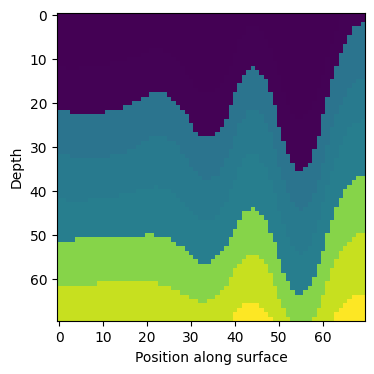

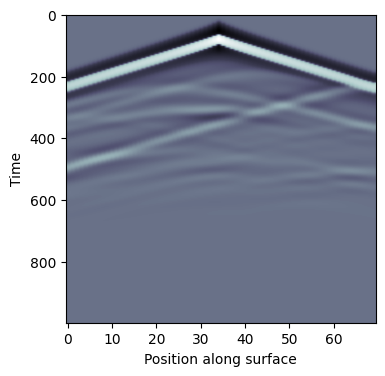

In [34]:
import numpy as np
def symlog(x, linthresh=1.0, base=10):
    """
    Applies a symmetric log transform to input array x.

    Parameters:
    - x : array-like
        Input data (can be positive or negative).
    - linthresh : float
        Range within which the function is linear (around 0).
    - base : float
        Logarithm base.

    Returns:
    - Transformed array.
    """
    x = np.asarray(x)
    sign = np.sign(x)
    abs_x = np.abs(x)

    log_part = sign * (np.log(abs_x / linthresh) / np.log(base) + 1)
    linear_part = x / linthresh

    return np.where(abs_x > linthresh, log_part, linear_part)
    
p=2006
d = data[p]
print(p, d.family)
d.load_to_memory()
plt.figure(figsize=(4,4))
plt.imshow(d.velocity.data.get())
plt.xlabel('Position along surface')
plt.ylabel('Depth')
plt.figure(figsize=(4,4))
plt.imshow(symlog(d.seismogram.data[2,...].get(),linthresh=1), aspect='auto', cmap='bone')
plt.xlabel('Position along surface')
plt.ylabel('Time')